In [591]:
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
from datetime import date
from sklearn.linear_model import SGDRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV
from sklearn.gaussian_process.kernels import DotProduct, WhiteKernel
from sklearn import linear_model
from statsmodels.tsa.statespace.sarimax import SARIMAX
from itertools import combinations
from sklearn.preprocessing import StandardScaler
from statsmodels.tsa.api import VAR
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import ParameterGrid
import numpy as np
import seaborn as sns
import warnings
from sklearn.pipeline import make_pipeline
from sklearn.kernel_ridge import KernelRidge
from statsmodels.tsa.arima.model import ARIMA
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_friedman2
from sklearn.ensemble import RandomForestRegressor
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.ensemble import VotingRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import SGDRegressor
import statsmodels.api as sm
import itertools
import pmdarima as pm
from sklearn.pipeline import make_pipeline
from pmdarima.arima import auto_arima
from sklearn.kernel_ridge import KernelRidge		
from sklearn.linear_model import LinearRegression
from statsmodels.tsa.ar_model import AutoReg
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error
from sklearn.tree import DecisionTreeRegressor
from pmdarima.model_selection import train_test_split
from evds import evdsAPI
import pandas as pd
import numpy as np
warnings.filterwarnings("ignore")

In [592]:
evds=evdsAPI('dsIC3fiGlu')


In [593]:
usd=evds.get_data(["TP.DK.USD.S.YTL"],startdate="01-02-2006",enddate=date.today().strftime("%d-%m-%Y"),frequency=2)
usd.dropna(inplace=True)
usd

,Tarih,TP_DK_USD_S_YTL
0,01-02-2006,1.33
1,02-02-2006,1.32
2,03-02-2006,1.33
3,06-02-2006,1.33
4,07-02-2006,1.33
...,...,...
4626,26-10-2023,28.13
4627,27-10-2023,28.15
4628,30-10-2023,28.18
4629,31-10-2023,28.26


In [594]:
usd['Tarih'] = pd.to_datetime(usd['Tarih'], format='%d-%m-%Y')

# Tarihi indeks olarak ayarla
usd.set_index('Tarih', inplace=True)

# Aylık ortalama değerleri hesapla
usd = usd.resample('M').mean()

# Sonucu görüntüle
usd

,TP_DK_USD_S_YTL
Tarih,
2006-02-28,1.33
2006-03-31,1.34
2006-04-30,1.34
2006-05-31,1.42
2006-06-30,1.60
...,...
2023-07-31,26.47
2023-08-31,27.00
2023-09-30,26.99


In [595]:
enf=evds.get_data(["TP.FG.J0"],startdate="01-02-2006",enddate=date.today().strftime("%d-%m-%Y"))
enf

,Tarih,TP_FG_J0
0,2006-2,123.84
1,2006-3,124.18
2,2006-4,125.84
3,2006-5,128.20
4,2006-6,128.63
...,...,...
207,2023-5,1300.60
208,2023-6,1351.59
209,2023-7,1479.84
210,2023-8,1614.31


In [596]:

enf=pd.DataFrame(enf)
enf.columns=["Tarih","TÜFE"]


In [597]:

inflation=enf
inflation

,Tarih,TÜFE
0,2006-2,123.84
1,2006-3,124.18
2,2006-4,125.84
3,2006-5,128.20
4,2006-6,128.63
...,...,...
207,2023-5,1300.60
208,2023-6,1351.59
209,2023-7,1479.84
210,2023-8,1614.31


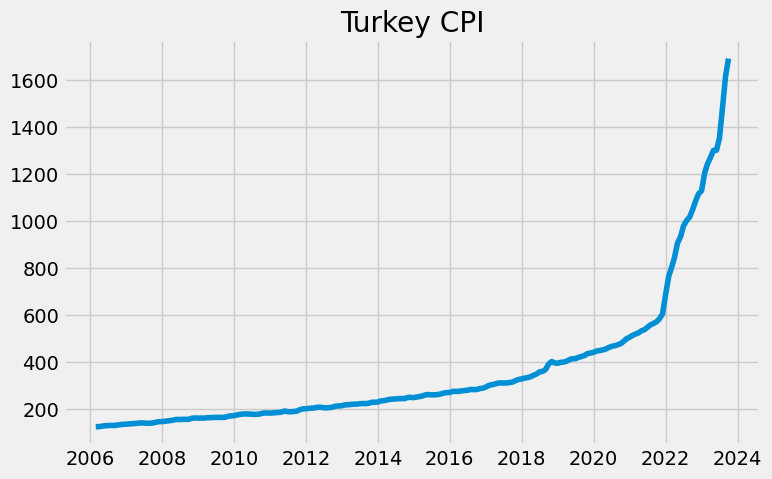

In [598]:
dates=pd.date_range('2006-02-01','2023-10-01' , freq='1M')
df=pd.DataFrame()

df["CPI"]=inflation["TÜFE"]
df=df.set_index(dates)
plt.figure(figsize=(8,5))
plt.title("Turkey CPI")
plt.plot(df)
plt.show()


In [599]:
df6=pd.DataFrame()
df6["USD/TL"]=usd["TP_DK_USD_S_YTL"]

df6["USD/TL"]=df6["USD/TL"].astype(float)
df6

,USD/TL
Tarih,
2006-02-28,1.33
2006-03-31,1.34
2006-04-30,1.34
2006-05-31,1.42
2006-06-30,1.60
...,...
2023-07-31,26.47
2023-08-31,27.00
2023-09-30,26.99


In [600]:
money=evds.get_data(["TP.PR.ARZ13"],startdate="28-02-2006",enddate=date.today().strftime("%d-%m-%Y"),frequency=2)
del money["Tarih"]
money['Tarih'] = pd.to_datetime(money['YEARWEEK'] + '-1', format='%Y-%W-%w')
money = money.groupby(money['Tarih'].dt.to_period('M'))['TP_PR_ARZ13'].mean()
money=pd.DataFrame(money)
money.columns=["Para Arzi"]
money=money/1e+08
money=money.set_index(pd.date_range('2006-02-28','2023-11-29' , freq='1M'))
money

,Para Arzi
2006-02-28,2.42
2006-03-31,2.47
2006-04-30,2.51
2006-05-31,2.65
2006-06-30,2.79
...,...
2023-06-30,104.03
2023-07-31,113.23
2023-08-31,119.11
2023-09-30,122.43


In [601]:
m3=evds.get_data(["TP.PR.ARZ22"],startdate="28-02-2006",enddate=date.today().strftime("%d-%m-%Y"),frequency=5)
del m3["Tarih"]
m3.columns=["M3 Para Arzi"]
m3=m3/1e+08
m3=m3.set_index(money.index)
m3

,M3 Para Arzi
2006-02-28,2.66
2006-03-31,2.73
2006-04-30,2.77
2006-05-31,3.03
2006-06-30,3.04
...,...
2023-06-30,111.10
2023-07-31,117.73
2023-08-31,123.43
2023-09-30,126.66


In [602]:

issizlik=evds.get_data(["TP.TIG08"],startdate="28-02-2006",enddate=date.today().strftime("%d-%m-%Y"),frequency=5)
del issizlik["Tarih"]
issizlik.columns=["İşsizlik"]
issizlik=issizlik.dropna(axis=0)
issizlik=issizlik.set_index(pd.date_range(start="2014-01-30",end="2023-09-29",freq="1M"))
issizlik

,İşsizlik
2014-01-31,9.20
2014-02-28,9.50
2014-03-31,9.50
2014-04-30,9.70
2014-05-31,9.70
...,...
2023-04-30,10.00
2023-05-31,9.50
2023-06-30,9.60
2023-07-31,9.40


In [603]:
brent=evds.get_data(["TP.BRENTPETROL.EUBP"],startdate="01-02-2006",enddate=date.today().strftime("%d-%m-%Y"),frequency=1)
brent

,Tarih,TP_BRENTPETROL_EUBP
0,01-02-2006,65.64
1,02-02-2006,63.49
2,03-02-2006,62.54
3,06-02-2006,63.32
4,07-02-2006,61.64
...,...,...
4619,17-10-2023,92.52
4620,18-10-2023,91.99
4621,19-10-2023,93.12
4622,20-10-2023,93.72


In [604]:
brent['Tarih'] = pd.to_datetime(brent['Tarih'], format='%d-%m-%Y')

# Tarihi indeks olarak ayarla
brent.set_index('Tarih', inplace=True)

# Aylık ortalama değerleri hesapla
brent = brent.resample('M').mean()

# Sonucu görüntüle

brent.iloc[-1,0]=90.44
brent

,TP_BRENTPETROL_EUBP
Tarih,
2006-02-28,60.21
2006-03-31,62.06
2006-04-30,70.26
2006-05-31,69.78
2006-06-30,68.56
...,...
2023-06-30,74.84
2023-07-31,80.11
2023-08-31,86.15


In [605]:
df14=pd.DataFrame()
dates=pd.date_range('2006-02-28','2023-11-29' , freq='1M')

df14["Brent"]=brent["TP_BRENTPETROL_EUBP"]
df14["TIME"]=dates
df14['TIME'].replace(regex=True,inplace=True, to_replace='M',value='')
df14['TIME'] =  pd.to_datetime(df14['TIME'], format='%Y%m', errors='ignore', infer_datetime_format=True)
df14 = df14.set_index(['TIME'])
df14

,Brent
TIME,
2006-02-28,60.21
2006-03-31,62.06
2006-04-30,70.26
2006-05-31,69.78
2006-06-30,68.56
...,...
2023-06-30,74.84
2023-07-31,80.11
2023-08-31,86.15


In [606]:
kredi=evds.get_data(["TP.KREDI.L001"],startdate="01-02-2006",enddate=date.today().strftime("%d-%m-%Y"),frequency=5)
kredi

,Tarih,TP_KREDI_L001
0,2006-2,138184669.00
1,2006-3,148122232.00
2,2006-4,152750951.00
3,2006-5,166488091.00
4,2006-6,174039476.00
...,...,...
208,2023-6,9564604472.00
209,2023-7,9846895191.00
210,2023-8,9923805535.00
211,2023-9,10258286970.00


In [607]:
dates=pd.date_range('2006-02-01','2023-11-01' , freq='1M')
kredi=pd.DataFrame(kredi)
kredi.columns=["Tarih","Kredi"]
kredi["Kredi"]=kredi["Kredi"]/1e+08
kredi

,Tarih,Kredi
0,2006-2,1.38
1,2006-3,1.48
2,2006-4,1.53
3,2006-5,1.66
4,2006-6,1.74
...,...,...
208,2023-6,95.65
209,2023-7,98.47
210,2023-8,99.24
211,2023-9,102.58


In [608]:
df3=pd.DataFrame()
df3["Kredi"]=kredi["Kredi"]
df3["TIME"]=dates
df3['TIME'].replace(regex=True,inplace=True, to_replace='M',value='')
df3['TIME'] =  pd.to_datetime(df3['TIME'], format='%Y%m', errors='ignore', infer_datetime_format=True)
df3 = df3.set_index(['TIME'])
df3=df3.set_index(pd.date_range('2006-02-28','2023-11-29' , freq='1M'))
df3

,Kredi
2006-02-28,1.38
2006-03-31,1.48
2006-04-30,1.53
2006-05-31,1.66
2006-06-30,1.74
...,...
2023-06-30,95.65
2023-07-31,98.47
2023-08-31,99.24
2023-09-30,102.58


In [609]:
pfaiz=evds.get_data(["TP.APIFON4"],startdate="01-02-2006",enddate=date.today().strftime("%d-%m-%Y"),frequency=5)
pfaiz.columns=["Tarih","Faiz"]
pfaiz.iloc[:11,1]=17.5
pfaiz.iloc[11:23,1]=21.5
pfaiz.iloc[23:35,1]=19.25
pfaiz.iloc[35:47,1]=10.25
pfaiz.iloc[47:59,1]=8
pfaiz["Faiz"]=pfaiz["Faiz"].astype(float)
#pfaiz.iloc[212,1]=35
pfaiz



,Tarih,Faiz
0,2006-2,17.50
1,2006-3,17.50
2,2006-4,17.50
3,2006-5,17.50
4,2006-6,17.50
...,...,...
209,2023-7,17.50
210,2023-8,23.50
211,2023-9,31.00
212,2023-10,33.00


In [610]:
dates=pd.date_range('2006-02-28','2023-12-29' , freq='1M')
pfaiz=pd.DataFrame(pfaiz)
pfaiz.columns=["Tarih","Politika Faizi"]
pfaiz["TIME"]=dates
pfaiz['TIME'].replace(regex=True,inplace=True, to_replace='M',value='')
pfaiz['TIME'] =  pd.to_datetime(pfaiz['TIME'], format='%Y%m', errors='ignore', infer_datetime_format=True)
pfaiz = pfaiz.set_index(['TIME'])
del pfaiz["Tarih"]
pfaiz

,Politika Faizi
TIME,
2006-02-28,17.50
2006-03-31,17.50
2006-04-30,17.50
2006-05-31,17.50
2006-06-30,17.50
...,...
2023-07-31,17.50
2023-08-31,23.50
2023-09-30,31.00


In [611]:
kfaiz=evds.get_data(["TP.KTFTUK"],startdate="01-02-2006",enddate=date.today().strftime("%d-%m-%Y"),frequency=5)
kfaiz.columns=["Tarih","Kredi Faizi"]
kfaiz=kfaiz.set_index(kfaiz["Tarih"])
del kfaiz["Tarih"]
kfaiz=kfaiz.astype(float)
kfaiz=kfaiz.set_index(pd.date_range('2006-02-28','2023-11-29' , freq='1M'))
kfaiz

,Kredi Faizi
2006-02-28,17.30
2006-03-31,17.01
2006-04-30,16.21
2006-05-31,16.30
2006-06-30,19.67
...,...
2023-06-30,38.56
2023-07-31,45.83
2023-08-31,45.77
2023-09-30,56.35


In [612]:
perakende=pd.read_excel("./perakende satis hacim endeksi ve degisim oranlari (sabit fiyatlarla) (2015=100).xls")
perakende1=perakende.iloc[5:,2].dropna(axis=0).astype(float)
perakende1=pd.DataFrame(perakende1)
perakende1.columns=["Arındırılmamış"]


perakende1["Takvimden Arındırılmış"]=perakende.iloc[5:169,4].astype(float)
perakende1["Mevsimsellikten ve Takvimden Arındırılmış"]=perakende.iloc[5:169,7].astype(float)
perakende1=perakende1.set_index(pd.date_range(start="2010-01-01",end="2023-09-01",freq="1M"))
perakende1

,Arındırılmamış,Takvimden Arındırılmış,Mevsimsellikten ve Takvimden Arındırılmış
2010-01-31,57.40,57.75,67.56
2010-02-28,57.32,57.18,68.19
2010-03-31,67.90,67.03,69.54
2010-04-30,67.05,66.46,70.18
2010-05-31,70.33,70.61,70.60
...,...,...,...
2023-04-30,165.92,169.89,174.40
2023-05-31,181.18,179.73,180.19
2023-06-30,180.07,186.14,180.13
2023-07-31,191.36,193.83,185.48


In [613]:
motorin=pd.read_excel("./motorin.xlsx")
motorin.columns=["Tarih","Motorin"]
motorin=motorin.set_index(pd.date_range(start="2003-01-01",end="2023-10-01",freq="1M"))
del motorin["Tarih"]
motorin=motorin.astype(float)
motorin

,Motorin
2003-01-31,1.37
2003-02-28,1.46
2003-03-31,1.53
2003-04-30,1.44
2003-05-31,1.40
...,...
2023-05-31,18.92
2023-06-30,22.10
2023-07-31,29.48
2023-08-31,37.37


In [614]:
sanayi=evds.get_data(["TP.SANAYREV4.Y1"],startdate="01-02-2006",enddate=date.today().strftime("%d-%m-%Y"),frequency=5)
sanayi=sanayi.set_index(pd.date_range(start="2006-02-01",end="2023-09-01",freq="1M"))
del sanayi["Tarih"]
sanayi.columns=["Sanayi"]
sanayi

,Sanayi
2006-02-28,55.82
2006-03-31,65.93
2006-04-30,62.50
2006-05-31,66.50
2006-06-30,67.52
...,...
2023-04-30,129.87
2023-05-31,149.38
2023-06-30,137.89
2023-07-31,145.48


In [615]:
mfaiz=evds.get_data(["TP.TRY.MT02"],startdate="01-02-2006",enddate=date.today().strftime("%d-%m-%Y"),frequency=5)
mfaiz=mfaiz.set_index(pd.date_range(start="2006-02-01",end="2023-11-01",freq="1M"))
del mfaiz["Tarih"]
mfaiz.columns=["Mevduat Faizi"]
mfaiz

,Mevduat Faizi
2006-02-28,15.76
2006-03-31,15.33
2006-04-30,15.18
2006-05-31,14.93
2006-06-30,15.58
...,...
2023-06-30,39.59
2023-07-31,33.12
2023-08-31,29.41
2023-09-30,41.66


In [616]:
from datetime import date
enf_belirsizlik=evds.get_data(["TP.BEK.S01.E.S"],startdate="30-06-2013",enddate=date.today().strftime("%d-%m-%Y"),frequency=5)
enf_belirsizlik=enf_belirsizlik.set_index(pd.date_range(start="2013-06-30",end="2023-11-29",freq="1M"))
del enf_belirsizlik["Tarih"]
enf_belirsizlik.columns=["Enflasyon Belirsizliği"]
enf_belirsizlik

,Enflasyon Belirsizliği
2013-06-30,0.62
2013-07-31,0.74
2013-08-31,0.74
2013-09-30,0.77
2013-10-31,0.65
...,...
2023-06-30,7.55
2023-07-31,7.70
2023-08-31,6.81
2023-09-30,7.30


In [617]:
borc=evds.get_data(["TP.KB.A09"],startdate="28-02-2010",enddate="30-10-2023",frequency=5)
del borc["Tarih"]
borc=borc.set_index(pd.date_range(start="2010-02-28",end="2023-10-29",freq="1M"))
borc.columns=["Borç"]
borc

,Borç
2010-02-28,339434378.00
2010-03-31,340678449.00
2010-04-30,343162893.00
2010-05-31,340520628.00
2010-06-30,343141864.00
...,...
2023-05-31,2348115084.00
2023-06-30,2575631482.00
2023-07-31,2643068440.00
2023-08-31,2758965144.00


In [618]:
redk=evds.get_data(["TP.RK.U01.Y"],startdate="31-03-2011",enddate="30-10-2023",frequency=5)
del redk["Tarih"]
redk=redk.set_index(pd.date_range(start="2011-03-30",end="2023-10-29",freq="1M"))
redk.columns=["REDK"]
redk

,REDK
2011-03-31,105.42
2011-04-30,107.10
2011-05-31,103.79
2011-06-30,101.84
2011-07-31,98.49
...,...
2023-05-31,94.52
2023-06-30,87.07
2023-07-31,81.77
2023-08-31,84.81


In [619]:
redkt=evds.get_data(["TP.RK.T1.Y"],startdate="31-03-2011",enddate="30-10-2023",frequency=5)
del redkt["Tarih"]
redkt=redkt.set_index(pd.date_range(start="2011-03-30",end="2023-10-29",freq="1M"))
redkt.columns=["REDKT"]
redkt

,REDKT
2011-03-31,111.62
2011-04-30,114.17
2011-05-31,112.89
2011-06-30,108.98
2011-07-31,104.82
...,...
2023-05-31,58.00
2023-06-30,51.60
2023-07-31,48.71
2023-08-31,52.42


In [620]:
data=pd.DataFrame()
data["USDTL"]=df6["USD/TL"].rolling(3).mean()
data["ParaArzi"]=money["Para Arzi"].shift(1)
data["Motorin"]=motorin["Motorin"]
data["Perakende Satış"]=perakende1["Mevsimsellikten ve Takvimden Arındırılmış"]
data["Sanayi"]=sanayi["Sanayi"]
data["Borç"]=borc["Borç"].shift(1)
data["Kredi"]=df3["Kredi"].rolling(2).mean()
data["REDK"]=redk["REDK"]
data["REDKT"]=redkt["REDKT"]
data["M3"]=m3["M3 Para Arzi"].shift(1)
data["TÜFE"]=df["CPI"]
data=data.pct_change(periods=1)*100
data=data.head(211)
data=data.dropna(axis=0)
data

,USDTL,ParaArzi,Motorin,Perakende Satış,Sanayi,Borç,Kredi,REDK,REDKT,M3,TÜFE
Tarih,,,,,,,,,,,
2011-04-30,-0.81,2.44,-1.22,-0.18,-3.80,0.68,2.98,1.59,2.28,1.64,0.87
2011-05-31,-0.40,0.46,-1.66,1.11,4.63,0.57,3.57,-3.09,-1.12,0.48,2.42
2011-06-30,0.42,1.96,2.06,2.49,4.31,0.19,3.12,-1.88,-3.46,2.45,-1.43
2011-07-31,2.80,1.98,2.24,1.26,-1.32,0.02,2.90,-3.29,-3.82,2.19,-0.41
2011-08-31,3.75,0.95,1.66,-0.30,-3.66,0.32,3.28,-4.21,-5.53,0.44,0.73
...,...,...,...,...,...,...,...,...,...,...,...
2023-04-30,0.96,3.88,-1.49,0.77,-14.13,10.51,5.41,-2.00,-0.87,4.19,2.39
2023-05-31,1.51,4.86,-7.53,3.32,15.02,2.66,3.54,1.03,-1.76,4.80,0.04
2023-06-30,7.07,0.79,16.81,-0.03,-7.69,2.41,5.71,-7.88,-11.03,-1.14,3.92


In [621]:

data["Enflasyon Belirsizliği"]=enf_belirsizlik
data["Kredi Faizi"]=kfaiz["Kredi Faizi"]
data["Mevduat Faizi"]=mfaiz["Mevduat Faizi"]
data["Zam"]=0
data["Politika Faizi"]=pfaiz["Politika Faizi"]
data["İşsizlik"]=issizlik["İşsizlik"]
yearly_mean = data.groupby(data.index.year)['TÜFE'].mean()
data['Şok'] = (data.index.year.map(yearly_mean) < data['TÜFE']).astype(int)
data=data.dropna(axis=0)
data=data[['USDTL', 'Motorin', 'Perakende Satış', 'Kredi Faizi','Zam', 'Sanayi', 'Enflasyon Belirsizliği','ParaArzi','Borç','Kredi','Mevduat Faizi','REDK','REDKT','Şok','M3','İşsizlik',"TÜFE"]]
data.iloc[0,4]=11.01
data.iloc[12,4]=12.3
data.iloc[24,4]=29.32
data.iloc[36,4]=7.92
data.iloc[48,4]=14.17
data.iloc[60,4]=25.45
data.iloc[72,4]=15
data.iloc[84,4]=26.56
data.iloc[96,4]=50
data.iloc[102,4]=30
data.iloc[108,4]=54
data.iloc[114,4]=34
data

,USDTL,Motorin,Perakende Satış,Kredi Faizi,Zam,Sanayi,Enflasyon Belirsizliği,ParaArzi,Borç,Kredi,Mevduat Faizi,REDK,REDKT,Şok,M3,İşsizlik,TÜFE
Tarih,,,,,,,,,,,,,,,,,
2014-01-31,3.73,2.88,3.94,13.51,11.01,-13.26,0.82,1.82,-0.58,3.27,9.02,-3.69,-5.09,1,3.41,9.20,1.98
2014-02-28,3.03,1.69,-4.49,15.46,0.00,-4.78,0.73,3.31,0.81,1.45,10.63,2.18,0.92,0,2.08,9.50,0.43
2014-03-31,2.47,-2.28,-0.07,15.89,0.00,12.63,0.80,0.50,0.19,0.34,11.31,0.47,0.64,1,0.23,9.50,1.13
2014-04-30,-1.34,-6.21,-0.77,15.86,0.00,-1.07,0.73,1.11,0.48,0.13,11.02,4.68,5.89,1,0.73,9.70,1.34
2014-05-31,-1.86,-0.56,0.43,15.43,0.00,1.48,0.80,-0.70,0.09,0.47,10.49,1.28,2.06,0,-0.09,9.70,0.40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-04-30,0.96,-1.49,0.77,29.23,0.00,-14.13,7.51,3.88,10.51,5.41,28.34,-2.00,-0.87,0,4.19,10.00,2.39
2023-05-31,1.51,-7.53,3.32,32.02,0.00,15.02,7.37,4.86,2.66,3.54,31.46,1.03,-1.76,0,4.80,9.50,0.04
2023-06-30,7.07,16.81,-0.03,38.56,0.00,-7.69,7.55,0.79,2.41,5.71,39.59,-7.88,-11.03,0,-1.14,9.60,3.92


In [622]:
import statsmodels.api as sm
from sklearn.model_selection import train_test_split 
from sklearn.metrics import mean_squared_error
warnings.filterwarnings("ignore")
features=['USDTL', 'Motorin', 'Perakende Satış', 'Borç', 'REDK', 'REDKT']
X = data[features]
y=data[["TÜFE"]]
X_train=X.iloc[:-3,:]
X_test=X.iloc[-3:,:]
y_train=y.iloc[:-3,:]
y_test=y.iloc[-3:,:]
model=LinearRegression()
model.fit(X_train,y_train)
rmse=[]
tahminler=pd.DataFrame()
tahminler["Aylık Enflasyon"]=y_test
tahminler["Linear Regression"]=model.predict(X_test)
rmse.append(np.sqrt(mean_squared_error(tahminler["Aylık Enflasyon"],tahminler["Linear Regression"])))


In [623]:
import statsmodels.api as sm
from sklearn.model_selection import train_test_split 
from sklearn.metrics import mean_squared_error
warnings.filterwarnings("ignore")
features=['Motorin', 'Zam', 'Enflasyon Belirsizliği', 'ParaArzi', 'Borç', 'Mevduat Faizi']
X = data[features]
y=data[["TÜFE"]]
X_train=X.iloc[:-3,:]
X_test=X.iloc[-3:,:]
y_train=y.iloc[:-3,:]
y_test=y.iloc[-3:,:]
model=RandomForestRegressor()
model.fit(X_train,y_train)

        


tahminler["Aylık Enflasyon"]=y_test
tahminler["Random Forest"]=model.predict(X_test)
rmse.append(np.sqrt(mean_squared_error(tahminler["Aylık Enflasyon"],tahminler["Random Forest"])))


In [624]:
from sklearn import linear_model
from sklearn.metrics import  mean_squared_error
warnings.filterwarnings("ignore")
features=['USDTL', 'Motorin', 'Perakende Satış', 'Borç', 'REDK', 'REDKT', 'Şok', 'İşsizlik']
X = data[features]
X_train=X.iloc[:-3,:]
X_test=X.iloc[-3:,:]
y_train=y.iloc[:-3,:]
y_test=y.iloc[-3:,:]
reg = linear_model.BayesianRidge()
reg.fit(X_train, y_train)

tahminler["Bayesian Regression"]=reg.predict(X_test)
rmse.append(np.sqrt(mean_squared_error(tahminler["Aylık Enflasyon"],tahminler["Bayesian Regression"])))


In [625]:

from sklearn.linear_model import SGDRegressor
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
warnings.filterwarnings("ignore")
features=['USDTL', 'Motorin', 'Perakende Satış', 'Borç', 'REDK', 'REDKT', 'Şok', 'İşsizlik']
X = data[features]
X_train=X.iloc[:-3,:]
X_test=X.iloc[-3:,:]
y_train=y.iloc[:-3,:]
y_test=y.iloc[-3:,:]

reg = linear_model.Lasso(alpha=0.1)
reg.fit(X_train,y_train)

tahminler["Lasso Regression"]=reg.predict(X_test)
rmse.append(np.sqrt(mean_squared_error(tahminler["Aylık Enflasyon"],tahminler["Lasso Regression"])))

In [626]:

from sklearn.linear_model import SGDRegressor
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
warnings.filterwarnings("ignore")
features=['USDTL', 'Motorin', 'Perakende Satış', 'Borç', 'REDKT']
X = data[features]
X_train=X.iloc[:-3,:]
X_test=X.iloc[-3:,:]
y_train=y.iloc[:-3,:]
y_test=y.iloc[-3:,:]
reg = make_pipeline(StandardScaler(),
                    SGDRegressor(max_iter=1000, tol=1e-3))
reg.fit(X_train, y_train)

tahminler["SGD Regressor"]=reg.predict(X_test)
rmse.append(np.sqrt(mean_squared_error(tahminler["Aylık Enflasyon"],tahminler["SGD Regressor"])))

In [627]:

from sklearn.linear_model import SGDRegressor
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
warnings.filterwarnings("ignore")
features=['USDTL', 'Motorin', 'Perakende Satış', 'Borç', 'REDK', 'REDKT']
X = data[features]
X_train=X.iloc[:-3,:]
X_test=X.iloc[-3:,:]
y_train=y.iloc[:-3,:]
y_test=y.iloc[-3:,:]
reg = linear_model.Lars(random_state=0)
reg.fit(X_train,y_train)

tahminler["Lars Regression"]=reg.predict(X_test)
rmse.append(np.sqrt(mean_squared_error(tahminler["Aylık Enflasyon"],tahminler["Lars Regression"])))

In [628]:

from sklearn.linear_model import SGDRegressor
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
import xgboost as xg
warnings.filterwarnings("ignore")
features=['USDTL', 'Motorin', 'Perakende Satış', 'Sanayi', 'ParaArzi', 'REDK']
X = data[features]
X_train=X.iloc[:-3,:]
X_test=X.iloc[-3:,:]
y_train=y.iloc[:-3,:]
y_test=y.iloc[-3:,:]
model = xg.XGBRegressor(objective ='reg:linear', 
                  n_estimators = 50, seed = 123)
model.fit(X_train,y_train)

tahminler["XGBoost"]=model.predict(X_test)
rmse.append(np.sqrt(mean_squared_error(tahminler["Aylık Enflasyon"],tahminler["XGBoost"])))

In [629]:
from sklearn.datasets import load_diabetes
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import VotingRegressor
from sklearn.datasets import make_friedman2
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import DotProduct, WhiteKernel
from sklearn.kernel_ridge import KernelRidge
warnings.filterwarnings("ignore")
features=['USDTL', 'Motorin', 'Perakende Satış', 'Borç', 'REDK', 'REDKT']
X = data[features]
X_train=X.iloc[:-3,:]
X_test=X.iloc[-3:,:]
y_train=y.iloc[:-3,:]
y_test=y.iloc[-3:,:]
kernel = DotProduct() + WhiteKernel()
gpr = GaussianProcessRegressor(kernel=kernel)
gpr.fit(X_train, y_train) 
        

        



tahminler["Gaussian Regression"]=gpr.predict(X_test)
rmse.append(np.sqrt(mean_squared_error(tahminler["Aylık Enflasyon"],tahminler["Gaussian Regression"])))



In [630]:
from sklearn.datasets import load_diabetes
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import VotingRegressor
from sklearn.datasets import make_friedman2
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import DotProduct, WhiteKernel
from sklearn.kernel_ridge import KernelRidge
warnings.filterwarnings("ignore")
features=['Motorin', 'Perakende Satış', 'Kredi Faizi', 'Enflasyon Belirsizliği', 'ParaArzi', 'Borç', 'Kredi', 'Mevduat Faizi', 'REDK', 'REDKT']
X = data[features]
X_train=X.iloc[:-3,:]
X_test=X.iloc[-3:,:]
y_train=y.iloc[:-3,:]
y_test=y.iloc[-3:,:]
krr = KernelRidge(alpha=1.0)
krr.fit(X_train, y_train)
        

        



tahminler["Kernel Regression"]=krr.predict(X_test)
rmse.append(np.sqrt(mean_squared_error(tahminler["Aylık Enflasyon"],tahminler["Kernel Regression"])))



In [631]:
rmse_df=pd.DataFrame(rmse,index=[tahminler.columns[1:]])
rmse_df.columns=["RMSE"]
rmse_df=rmse_df.sort_values(by="RMSE")
rmse_df

,RMSE
Kernel Regression,0.04
XGBoost,0.07
Linear Regression,0.09
Lars Regression,0.09
Gaussian Regression,0.11
Bayesian Regression,0.13
SGD Regressor,0.14
Lasso Regression,0.15
Random Forest,0.21


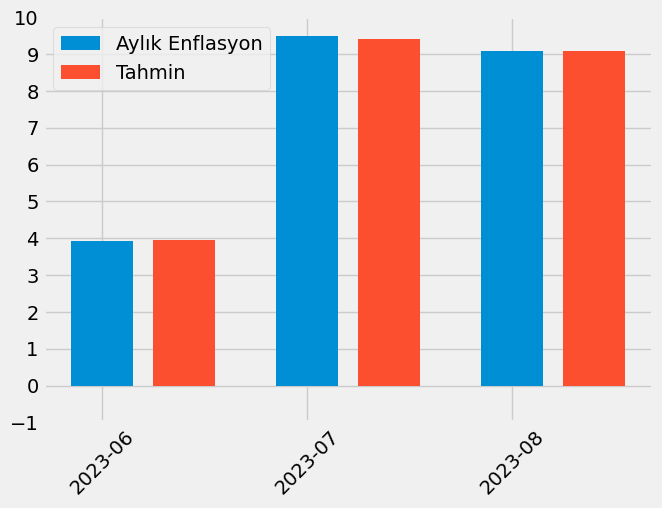

In [632]:
X_axis = np.arange(len(tahminler))
plt.figure(figsize=(7,5)) 
plt.bar(X_axis,tahminler["Aylık Enflasyon"],width=0.3,label="Aylık Enflasyon")
plt.bar(X_axis+0.4,tahminler["Kernel Regression"],width=0.3,label="Tahmin")
plt.xticks(X_axis,tahminler.index.strftime("%Y-%m"),rotation=45)
plt.yticks(np.arange(-1,11,1))
plt.legend()

In [633]:
from statsmodels.tsa.arima.model import ARIMA

model = SARIMAX(df6["USD/TL"], order=(0,2,1),seasonal_order=(0,0,0,12),trend='c')
model_fit = model.fit()
usdtahmin = model_fit.forecast(steps=14)
usdtahmin=pd.DataFrame(usdtahmin)
usdtahmin.columns=["USDTL"]
row=pd.DataFrame({"USDTL":df6.iloc[210:,0]},index=pd.date_range(start="2023-08-30",end="2023-12-29",freq="1M"))
usdtahmin=pd.concat([row,usdtahmin],axis=0)
usdtahmin

,USDTL
2023-08-31,27.00
2023-09-30,26.99
2023-10-31,27.85
2023-11-30,28.29
2023-12-31,29.07
2024-01-31,29.85
2024-02-29,30.63
2024-03-31,31.42
2024-04-30,32.21
2024-05-31,33.01


In [634]:
from statsmodels.tsa.ar_model import AutoReg
import statsmodels as sm
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error
import numpy as np
from sklearn.model_selection import ParameterGrid
from statsmodels.tsa.api import VAR
from statsmodels.graphics.tsaplots import month_plot
import warnings


model = SARIMAX(df14["Brent"], order=(1, 1, 0), seasonal_order=(2, 1, 0, 12))

# Modeli eğitin
model_fit = model.fit(disp=0)

# Gelecekteki değerleri tahmin edin
n_forecast = 15# 12 aylık bir tahmin yapalım (örnek olarak)
forecast = model_fit.get_forecast(steps=n_forecast)
forecast_values = forecast.predicted_mean
brenttahmin=pd.DataFrame(forecast_values)
brenttahmin.columns=["Brent"]
row=pd.DataFrame({"Brent":df14.iloc[209:213,0]},index=pd.date_range(start="2023-07-30",end="2023-11-29",freq="1M"))
brenttahmin=pd.concat([row,brenttahmin],axis=0)
brenttahmin

,Brent
2023-07-31,80.11
2023-08-31,86.15
2023-09-30,93.72
2023-10-31,90.44
2023-11-30,88.32
2023-12-31,85.41
2024-01-31,90.27
2024-02-29,95.50
2024-03-31,99.26
2024-04-30,98.90


In [635]:
model = SARIMAX(perakende1["Mevsimsellikten ve Takvimden Arındırılmış"], order=(1,1,1),seasonal_order=(0,1,1,12))
model_fit = model.fit()
perakendetahmin = model_fit.forecast(steps=15)
perakendetahmin=pd.DataFrame(perakendetahmin)
perakendetahmin.columns=["Perakende"]
row=pd.DataFrame({"Perakende":perakende1.iloc[163,0]},index=pd.date_range(start="2023-08-30",end="2023-09-29",freq="1M"))
perakendetahmin=pd.concat([row,perakendetahmin],axis=0)
perakendetahmin

,Perakende
2023-08-31,184.75
2023-09-30,177.06
2023-10-31,178.13
2023-11-30,179.37
2023-12-31,179.53
2024-01-31,180.65
2024-02-29,180.46
2024-03-31,182.41
2024-04-30,180.24
2024-05-31,181.50


In [636]:
model = SARIMAX(money["Para Arzi"].iloc[:-1], order=(0,2,2))
model_fit = model.fit()


# Gelecekteki değerleri tahmin edin
n_forecast = 16 # 12 aylık bir tahmin yapalım (örnek olarak)
forecast = model_fit.get_forecast(steps=n_forecast)
forecast_values = forecast.predicted_mean
paraarzitahmin=pd.DataFrame(forecast_values)
paraarzitahmin.columns=["Para Arzi"]
paraarzitahmin=pd.concat([pd.DataFrame({"Para Arzi":money.iloc[209:212,0]},index=pd.date_range(start="2023-07-30",end="2023-10-29",freq="1M")),paraarzitahmin],axis=0)
paraarzitahmin

,Para Arzi
2023-07-31,113.23
2023-08-31,119.11
2023-09-30,122.43
2023-10-31,126.63
2023-11-30,131.20
2023-12-31,135.76
2024-01-31,140.32
2024-02-29,144.89
2024-03-31,149.45
2024-04-30,154.01


In [637]:
model = SARIMAX(kfaiz["Kredi Faizi"].iloc[:-1], order=(1,1,0),seasonal_order=(0,0,0,12))
model_fit = model.fit()

# Gelecekteki değerleri tahmin edin
n_forecast = 16 # 12 aylık bir tahmin yapalım (örnek olarak)
forecast = model_fit.get_forecast(steps=n_forecast)
forecast_values = forecast.predicted_mean
kfaiztahmin=pd.DataFrame(forecast_values)
kfaiztahmin.columns=["Kredi Faizi"]
new_row=pd.DataFrame({"Kredi Faizi":kfaiz.iloc[210:212,0]},index=pd.date_range(start="2023-08-30",end="2023-10-29",freq="1M"))
kfaiztahmin=pd.concat([new_row,kfaiztahmin],axis=0)
kfaiztahmin



,Kredi Faizi
2023-08-31,45.77
2023-09-30,56.35
2023-10-31,61.91
2023-11-30,64.83
2023-12-31,66.37
2024-01-31,67.17
2024-02-29,67.60
2024-03-31,67.82
2024-04-30,67.93
2024-05-31,68.00


In [638]:
model = ARIMA(mfaiz.iloc[:-1], order=(3, 1, 1))

# Modeli eğitin
model_fit = model.fit()

# Gelecekteki değerleri tahmin edin
n_forecast = 16 # 12 aylık bir tahmin yapalım (örnek olarak)
forecast = model_fit.get_forecast(steps=n_forecast)
forecast_values = forecast.predicted_mean
mfaiztahmin=pd.DataFrame(forecast_values)
mfaiztahmin.columns=["Mevduat Faizi"]
new_row=pd.DataFrame({"Mevduat Faizi":mfaiz.iloc[210:212,0]},index=pd.date_range(start="2023-08-30",end="2023-10-29",freq="1M"))
mfaiztahmin=pd.concat([new_row,mfaiztahmin],axis=0)
mfaiztahmin

,Mevduat Faizi
2023-08-31,29.41
2023-09-30,41.66
2023-10-31,42.67
2023-11-30,34.93
2023-12-31,40.19
2024-01-31,45.06
2024-02-29,38.90
2024-03-31,38.72
2024-04-30,44.28
2024-05-31,41.67


In [639]:
usdtahmin["brent"]=brenttahmin
usdtahmin=usdtahmin.dropna(axis=0)
degisim=pd.DataFrame((((usdtahmin["USDTL"]*usdtahmin["brent"]).pct_change(periods=1)+1).values)[1:],index=pd.date_range(start="2023-08-30",end="2025-01-29",freq="1M"))
degisim.columns=["Değişim"]
degisim=degisim.iloc[1:17]
degisim

,Değişim
2023-09-30,1.00
2023-10-31,0.99
2023-11-30,0.99
2023-12-31,1.09
2024-01-31,1.09
2024-02-29,1.07
2024-03-31,1.02
2024-04-30,1.02
2024-05-31,1.06
2024-06-30,1.03


In [640]:
motorintahmin=pd.DataFrame()
motorintahmin["Değişim"]=degisim
motorintahmin["Motorin"]=39.18
for i in range(1,16):
    motorintahmin.iloc[i,1]=motorintahmin.iloc[i,0]*motorintahmin.iloc[i-1,1]

del motorintahmin["Değişim"]
new_row=pd.DataFrame({"Motorin":motorin.iloc[247,0]},index=pd.date_range(start="2023-08-30",end="2023-09-29",freq="1M"))
motorintahmin=pd.concat([new_row,motorintahmin],axis=0)
motorintahmin

,Motorin
2023-08-31,37.37
2023-09-30,39.18
2023-10-31,38.87
2023-11-30,38.62
2023-12-31,41.92
2024-01-31,45.51
2024-02-29,48.52
2024-03-31,49.57
2024-04-30,50.62
2024-05-31,53.76


In [641]:

zamtahmin=pd.DataFrame()
zamtahmin["Zam"]=[0,00,0,0,0,35,0,0,0,0,0,0,0,0,0,0,0,30]
zamtahmin.columns=["Zam"]
zamtahmin=zamtahmin.set_index(pd.date_range(start="2023-08-30",end="2025-02-27",freq="1M"))
zamtahmin

,Zam
2023-08-31,0
2023-09-30,0
2023-10-31,0
2023-11-30,0
2023-12-31,0
2024-01-31,35
2024-02-29,0
2024-03-31,0
2024-04-30,0
2024-05-31,0


In [642]:
model = ARIMA(df3["Kredi"].iloc[:-1], order=(5, 2, 0))

# Modeli eğitin
model_fit = model.fit()

# Gelecekteki değerleri tahmin edin
n_forecast = 16 # 12 aylık bir tahmin yapalım (örnek olarak)
forecast = model_fit.get_forecast(steps=n_forecast)
forecast_values = forecast.predicted_mean
kreditahmin=pd.DataFrame(forecast_values)
kreditahmin.columns=["Kredi"]
new_row=pd.DataFrame({"Kredi":[98.46,99.23,102.58]},index=pd.date_range(start="2023-07-30",end="2023-10-29",freq="1M"))
kreditahmin=pd.concat([new_row,kreditahmin],axis=0)
kreditahmin

,Kredi
2023-07-31,98.46
2023-08-31,99.23
2023-09-30,102.58
2023-10-31,105.39
2023-11-30,107.00
2023-12-31,111.60
2024-01-31,115.21
2024-02-29,117.05
2024-03-31,120.49
2024-04-30,123.72


In [643]:
model = ARIMA(borc["Borç"], order=(0, 2, 1), seasonal_order=(0, 0, 0, 12))

# Modeli eğitin
model_fit = model.fit()

# Gelecekteki değerleri tahmin edin
n_forecast = 17# 12 aylık bir tahmin yapalım (örnek olarak)
forecast = model_fit.get_forecast(steps=n_forecast)
forecast_values = forecast.predicted_mean
borctahmin=pd.DataFrame(forecast_values)
borctahmin.columns=["Borç"]
new_row=pd.DataFrame({"Borç":[2643068440,2758965144,2859751220]},index=pd.date_range(start="2023-07-30",end="2023-10-29",freq="1M"))
borctahmin=pd.concat([new_row,borctahmin],axis=0)
borctahmin

,Borç
2023-07-31,2643068440.00
2023-08-31,2758965144.00
2023-09-30,2859751220.00
2023-10-31,2967250358.71
2023-11-30,3074749497.42
2023-12-31,3182248636.14
2024-01-31,3289747774.85
2024-02-29,3397246913.56
2024-03-31,3504746052.27
2024-04-30,3612245190.99


In [644]:
model = SARIMAX(redk["REDK"], order=(5, 2, 0),seasonal_order=(0,0,0,12))

# Modeli eğitin
model_fit = model.fit()

# Gelecekteki değerleri tahmin edin
n_forecast = 16# 12 aylık bir tahmin yapalım (örnek olarak)
forecast = model_fit.get_forecast(steps=n_forecast)
forecast_values = forecast.predicted_mean
redktahmin=pd.DataFrame(forecast_values)
redktahmin.columns=["REDK"]
new_row=pd.DataFrame({"REDK":[84.81,88.29]},index=pd.date_range(start="2023-08-30",end="2023-10-29",freq="1M"))
redktahmin=pd.concat([new_row,redktahmin],axis=0)
redktahmin

,REDK
2023-08-31,84.81
2023-09-30,88.29
2023-10-31,87.53
2023-11-30,86.65
2023-12-31,84.84
2024-01-31,83.06
2024-02-29,83.18
2024-03-31,83.88
2024-04-30,83.44
2024-05-31,82.66


In [645]:
model = SARIMAX(redkt["REDKT"], order=(2, 1, 0), seasonal_order=(0, 0, 0, 12),trend='c')

# Modeli eğitin
model_fit = model.fit(disp=0)

# Gelecekteki değerleri tahmin edin
n_forecast = 16# 12 aylık bir tahmin yapalım (örnek olarak)
forecast = model_fit.get_forecast(steps=n_forecast)
forecast_values = forecast.predicted_mean
redkttahmin=pd.DataFrame(forecast_values)
redkttahmin.columns=["REDKT"]
new_row=pd.DataFrame({"REDKT":[52.42,55.52]},index=pd.date_range(start="2023-08-30",end="2023-10-29",freq="1M"))
redkttahmin=pd.concat([new_row,redkttahmin],axis=0)
redkttahmin

,REDKT
2023-08-31,52.42
2023-09-30,55.52
2023-10-31,55.31
2023-11-30,54.11
2023-12-31,53.41
2024-01-31,53.13
2024-02-29,52.87
2024-03-31,52.51
2024-04-30,52.11
2024-05-31,51.72


In [646]:
model = SARIMAX(m3["M3 Para Arzi"].iloc[:-1], order=(1, 2, 2),trend='c')

# Modeli eğitin
model_fit = model.fit()

# Gelecekteki değerleri tahmin edin
n_forecast = 16# 12 aylık bir tahmin yapalım (örnek olarak)
forecast = model_fit.get_forecast(steps=n_forecast)
forecast_values = forecast.predicted_mean
m3tahmin=pd.DataFrame(forecast_values)
m3tahmin.columns=["M3 Para Arzi"]
new_row=pd.DataFrame({"M3 Para Arzi":[117.729649878,123.43,126.66]},index=pd.date_range(start="2023-07-30",end="2023-10-29",freq="1M"))
m3tahmin=pd.concat([new_row,m3tahmin],axis=0)
m3tahmin

,M3 Para Arzi
2023-07-31,117.73
2023-08-31,123.43
2023-09-30,126.66
2023-10-31,132.41
2023-11-30,136.78
2023-12-31,142.41
2024-01-31,146.98
2024-02-29,152.53
2024-03-31,157.25
2024-04-30,162.75


In [647]:
model = SARIMAX(issizlik["İşsizlik"], order=(2, 1, 2), seasonal_order=(1, 0, 0, 12))

# Modeli eğitin
model_fit = model.fit(disp=0)

# Gelecekteki değerleri tahmin edin
n_forecast = 17# 12 aylık bir tahmin yapalım (örnek olarak)
forecast = model_fit.get_forecast(steps=n_forecast)
forecast_values = forecast.predicted_mean
issizliktahmin=pd.DataFrame(forecast_values)
issizliktahmin.columns=["İşsizlik"]
new_row=pd.DataFrame({"İşsizlik":[9.2]},index=pd.date_range(start="2023-08-30",end="2023-09-29",freq="1M"))
issizliktahmin=pd.concat([new_row,issizliktahmin],axis=0)
issizliktahmin

,İşsizlik
2023-08-31,9.20
2023-09-30,9.23
2023-10-31,9.23
2023-11-30,9.15
2023-12-31,9.18
2024-01-31,9.34
2024-02-29,9.18
2024-03-31,9.20
2024-04-30,9.28
2024-05-31,9.32


In [648]:
model = SARIMAX(enf_belirsizlik["Enflasyon Belirsizliği"], order=(0, 1, 0),seasonal_order=(0,0,1,12))

# Modeli eğitin
model_fit = model.fit(disp=0)

# Gelecekteki değerleri tahmin edin
n_forecast = 15# 12 aylık bir tahmin yapalım (örnek olarak)
forecast = model_fit.get_forecast(steps=n_forecast)
forecast_values = forecast.predicted_mean
enfbelirsizliktahmin=pd.DataFrame(forecast_values)
enfbelirsizliktahmin.columns=["Enflasyon Belirsizliği"]
new_row=pd.DataFrame({"Enflasyon Belirsizliği":[6.81,7.3,5.57]},index=pd.date_range(start="2023-08-30",end="2023-11-29",freq="1M"))
enfbelirsizliktahmin=pd.concat([new_row,enfbelirsizliktahmin],axis=0)
enfbelirsizliktahmin

,Enflasyon Belirsizliği
2023-08-31,6.81
2023-09-30,7.30
2023-10-31,5.57
2023-11-30,5.74
2023-12-31,5.80
2024-01-31,5.99
2024-02-29,5.55
2024-03-31,5.50
2024-04-30,5.53
2024-05-31,5.39


In [649]:
model = SARIMAX(sanayi["Sanayi"], order=(3, 1, 2), seasonal_order=(1, 0, 4, 12))

# Modeli eğitin
model_fit = model.fit(disp=0)

# Gelecekteki değerleri tahmin edin
n_forecast = 17# 12 aylık bir tahmin yapalım (örnek olarak)
forecast = model_fit.get_forecast(steps=n_forecast)
forecast_values = forecast.predicted_mean
sanayitahmin=pd.DataFrame(forecast_values)
sanayitahmin.columns=["Sanayi"]
new_row=pd.DataFrame({"Sanayi":[149.23]},index=pd.date_range(start="2023-08-30",end="2023-09-29",freq="1M"))
sanayitahmin=pd.concat([new_row,sanayitahmin],axis=0)
sanayitahmin

,Sanayi
2023-08-31,149.23
2023-09-30,150.98
2023-10-31,154.00
2023-11-30,153.69
2023-12-31,161.05
2024-01-31,142.03
2024-02-29,134.54
2024-03-31,150.32
2024-04-30,129.42
2024-05-31,143.22


In [650]:

model = SARIMAX(df6["USD/TL"], order=(0,2,1),seasonal_order=(0,0,0,12))
model_fit = model.fit()
usdtahmin = model_fit.forecast(steps=14)
usdtahmin=pd.DataFrame(usdtahmin)
usdtahmin.columns=["USDTL"]
row=pd.DataFrame({"USDTL":df6.iloc[207:,0]},index=pd.date_range(start="2023-05-30",end="2023-12-29",freq="1M"))
usdtahmin=pd.concat([row,usdtahmin],axis=0)
usdtahmin

,USDTL
2023-05-31,19.72
2023-06-30,23.11
2023-07-31,26.47
2023-08-31,27.00
2023-09-30,26.99
2023-10-31,27.85
2023-11-30,28.29
2023-12-31,29.06
2024-01-31,29.83
2024-02-29,30.60


In [651]:
import statsmodels.api as sm
tahmindf=pd.DataFrame()
tahmindf=pd.concat([usdtahmin["USDTL"].rolling(3).mean(),paraarzitahmin["Para Arzi"].shift(1),motorintahmin["Motorin"],enfbelirsizliktahmin,perakendetahmin,sanayitahmin,kreditahmin.rolling(2).mean(),redktahmin,redkttahmin,m3tahmin.shift(1),borctahmin.shift(1)],axis=1)
tahmindf=tahmindf.pct_change(periods=1)*100
tahmindf=tahmindf.dropna(axis=0)
tahmindf["Enflasyon Belirsizliği"]=enfbelirsizliktahmin
tahmindf["Zam"]=zamtahmin["Zam"]
tahmindf["Kredi Faizi"]=kfaiztahmin["Kredi Faizi"]
tahmindf["Mevduat Faizi"]=mfaiztahmin["Mevduat Faizi"]
tahmindf["İşsizlik"]=issizliktahmin



tahmindf["Şok"]=0

tahmindf=tahmindf[['USDTL', 'Motorin', 'Perakende', 'Kredi Faizi', 'Zam', 'Sanayi',
       'Enflasyon Belirsizliği', 'Para Arzi', 'Borç', 'Kredi', 'Mevduat Faizi','REDK','REDKT','Şok','M3 Para Arzi','İşsizlik']]

tahmindf.columns=data.columns[:16]
tahmindf=tahmindf.dropna(axis=0)
tahmindf=tahmindf.iloc[:-1]
tahmindf

,USDTL,Motorin,Perakende Satış,Kredi Faizi,Zam,Sanayi,Enflasyon Belirsizliği,ParaArzi,Borç,Kredi,Mevduat Faizi,REDK,REDKT,Şok,M3,İşsizlik
2023-09-30,5.07,4.84,-4.16,56.35,0.00,1.17,7.30,5.20,4.38,2.08,41.66,4.10,5.91,0,4.84,9.23
2023-10-31,1.71,-0.79,0.60,61.91,0.00,2.00,5.57,2.78,3.65,3.05,42.67,-0.86,-0.38,0,2.62,9.23
2023-11-30,1.57,-0.64,0.70,64.83,0.00,-0.20,5.74,3.44,3.76,2.13,34.93,-1.00,-2.16,0,4.54,9.15
2023-12-31,2.49,8.53,0.09,66.37,0.00,4.78,5.80,3.60,3.62,2.92,40.19,-2.09,-1.29,0,3.30,9.18
2024-01-31,2.33,8.58,0.62,67.17,35.00,-11.80,5.99,3.48,3.50,3.75,45.06,-2.10,-0.52,0,4.12,9.34
2024-02-29,2.66,6.61,-0.11,67.60,0.00,-5.28,5.55,3.36,3.38,2.41,38.90,0.14,-0.49,0,3.20,9.18
2024-03-31,2.59,2.15,1.08,67.82,0.00,11.73,5.50,3.25,3.27,2.27,38.72,0.84,-0.68,0,3.78,9.20
2024-04-30,2.52,2.13,-1.19,67.93,0.00,-13.90,5.53,3.15,3.16,2.80,44.28,-0.52,-0.76,0,3.10,9.28
2024-05-31,2.46,6.21,0.70,68.00,0.00,10.66,5.39,3.05,3.07,2.13,41.67,-0.93,-0.74,0,3.50,9.32
2024-06-30,2.40,3.05,2.19,68.03,0.00,-1.38,5.34,2.96,2.98,2.17,38.61,-0.97,-0.72,0,2.99,9.27


In [652]:
features=['Zam', 'ParaArzi', 'Borç', 'Mevduat Faizi', 'REDKT', 'Şok']

X = data[features]
y=data["TÜFE"]
reg = make_pipeline(StandardScaler(),
                    SGDRegressor(max_iter=100000, tol=1e-6))
reg.fit(X, y)

tüfetahmin1 = []
result = 1614.31
sgdtahmin=reg.predict(tahmindf[features])
for i in range(len(sgdtahmin)):
    result *= (1 + sgdtahmin[i] / 100)
    tüfetahmin1.append(result)

tüfetahmin1 = np.array(tüfetahmin1).reshape(-1, 1)
tüfetahmin1 = pd.DataFrame(tüfetahmin1)
tüfetahmin1.columns = ["SGD Regressor"]
tüfetahmin1 = tüfetahmin1.set_index(pd.date_range(start="2023-09-30", end="2025-01-30", freq="1M"))
tüfetahmin1

,SGD Regressor
2023-09-30,1692.72
2023-10-31,1760.17
2023-11-30,1823.10
2023-12-31,1897.62
2024-01-31,2008.35
2024-02-29,2085.45
2024-03-31,2164.06
2024-04-30,2255.36
2024-05-31,2344.08
2024-06-30,2428.76


In [653]:
'''from itertools import chain, combinations
from sklearn.linear_model import LinearRegression
import numpy as np
import pandas as pd
features=tahmindf.columns
# Bütün kombinasyonları döndüren bir fonksiyon
def all_subsets(features):
    return chain(*map(lambda x: combinations(features, x), range(0, len(features)+1)))

# Başlangıçta fark olarak büyük bir değer atayarak en yakın değeri bulmaya çalışıyoruz
min_difference = float('inf')
min_difference1 = float('inf')
best_features = None

for subset in all_subsets(features):
    if not subset:  # boş kombinasyonları atla
        continue

    # Kullanılacak olan özellikleri seç
    X_subset = data[list(subset)]

    # Modeli eğit
    
    model = linear_model.Lars(fit_intercept=True)
    model.fit(X_subset,y)

    # Tahmin yap
    lassotahmin = model.predict(np.array(tahmindf[list(subset)]))
    result = 1614.31
    results = []
    for i in range(len(lassotahmin)):
        result *= (1 + lassotahmin[i] / 100)
        results.append(result)

    # Şartları kontrol et
    difference_1 = abs(results[0] - 1691)
    difference_2 = abs(results[1] - 1760)
    difference_3=abs(results[3]-1896)
    
    if difference_3<min_difference1 and (difference_1 + difference_2) < min_difference:
        min_difference = difference_1 + difference_2
        min_difference1=abs(results[3]-1896)
        best_features = subset

print("En iyi feature kombinasyonu:", best_features)'''


'from itertools import chain, combinations\nfrom sklearn.linear_model import LinearRegression\nimport numpy as np\nimport pandas as pd\nfeatures=tahmindf.columns\n# Bütün kombinasyonları döndüren bir fonksiyon\ndef all_subsets(features):\n    return chain(*map(lambda x: combinations(features, x), range(0, len(features)+1)))\n\n# Başlangıçta fark olarak büyük bir değer atayarak en yakın değeri bulmaya çalışıyoruz\nmin_difference = float(\'inf\')\nmin_difference1 = float(\'inf\')\nbest_features = None\n\nfor subset in all_subsets(features):\n    if not subset:  # boş kombinasyonları atla\n        continue\n\n    # Kullanılacak olan özellikleri seç\n    X_subset = data[list(subset)]\n\n    # Modeli eğit\n    \n    model = linear_model.Lars(fit_intercept=True)\n    model.fit(X_subset,y)\n\n    # Tahmin yap\n    lassotahmin = model.predict(np.array(tahmindf[list(subset)]))\n    result = 1614.31\n    results = []\n    for i in range(len(lassotahmin)):\n        result *= (1 + lassotahmin[i] /

In [654]:
features=['USDTL', 'Motorin', 'Kredi Faizi',
       'Enflasyon Belirsizliği', 'ParaArzi', 'Borç', 'Mevduat Faizi']


X = data[features]
model=LinearRegression()
model.fit(X, y)

tüfetahmin2 = []
result = 1614.31
lineartahmin = model.predict(np.array(tahmindf[features]))
lineartahmin=lineartahmin.ravel()
for i in range(len(lineartahmin)):
    result *= (1 + lineartahmin[i] / 100)
    tüfetahmin2.append(result)

tüfetahmin2 = np.array(tüfetahmin2).reshape(-1, 1)
tüfetahmin2 = pd.DataFrame(tüfetahmin2)
tüfetahmin2.columns = ["Linear Regression"]
tüfetahmin2 = tüfetahmin2.set_index(pd.date_range(start="2023-09-30", end="2025-01-30", freq="1M"))
tüfetahmin2


,Linear Regression
2023-09-30,1691.96
2023-10-31,1744.50
2023-11-30,1804.92
2023-12-31,1887.98
2024-01-31,1973.75
2024-02-29,2060.57
2024-03-31,2140.79
2024-04-30,2221.70
2024-05-31,2315.13
2024-06-30,2405.01


In [655]:
features=['USDTL', 'Motorin', 'Kredi Faizi',
       'Enflasyon Belirsizliği', 'ParaArzi', 'Borç', 'Mevduat Faizi']

X = data[features]
reg = linear_model.Lasso(alpha=0.1)
reg.fit(X,y)


tüfetahmin5 = []
result = 1614.31
lassotahmin=reg.predict(tahmindf[features])
for i in range(len(lassotahmin)):
    result *= (1 + lassotahmin[i] / 100)
    tüfetahmin5.append(result)

tüfetahmin5 = np.array(tüfetahmin5).reshape(-1, 1)
tüfetahmin5 = pd.DataFrame(tüfetahmin5)
tüfetahmin5.columns = ["Lasso Regression"]
tüfetahmin5 = tüfetahmin5.set_index(pd.date_range(start="2023-09-30", end="2025-01-30", freq="1M"))
tüfetahmin5

,Lasso Regression
2023-09-30,1691.12
2023-10-31,1742.56
2023-11-30,1798.96
2023-12-31,1879.30
2024-01-31,1963.48
2024-02-29,2046.58
2024-03-31,2122.59
2024-04-30,2200.98
2024-05-31,2290.94
2024-06-30,2375.94


<Axes: >

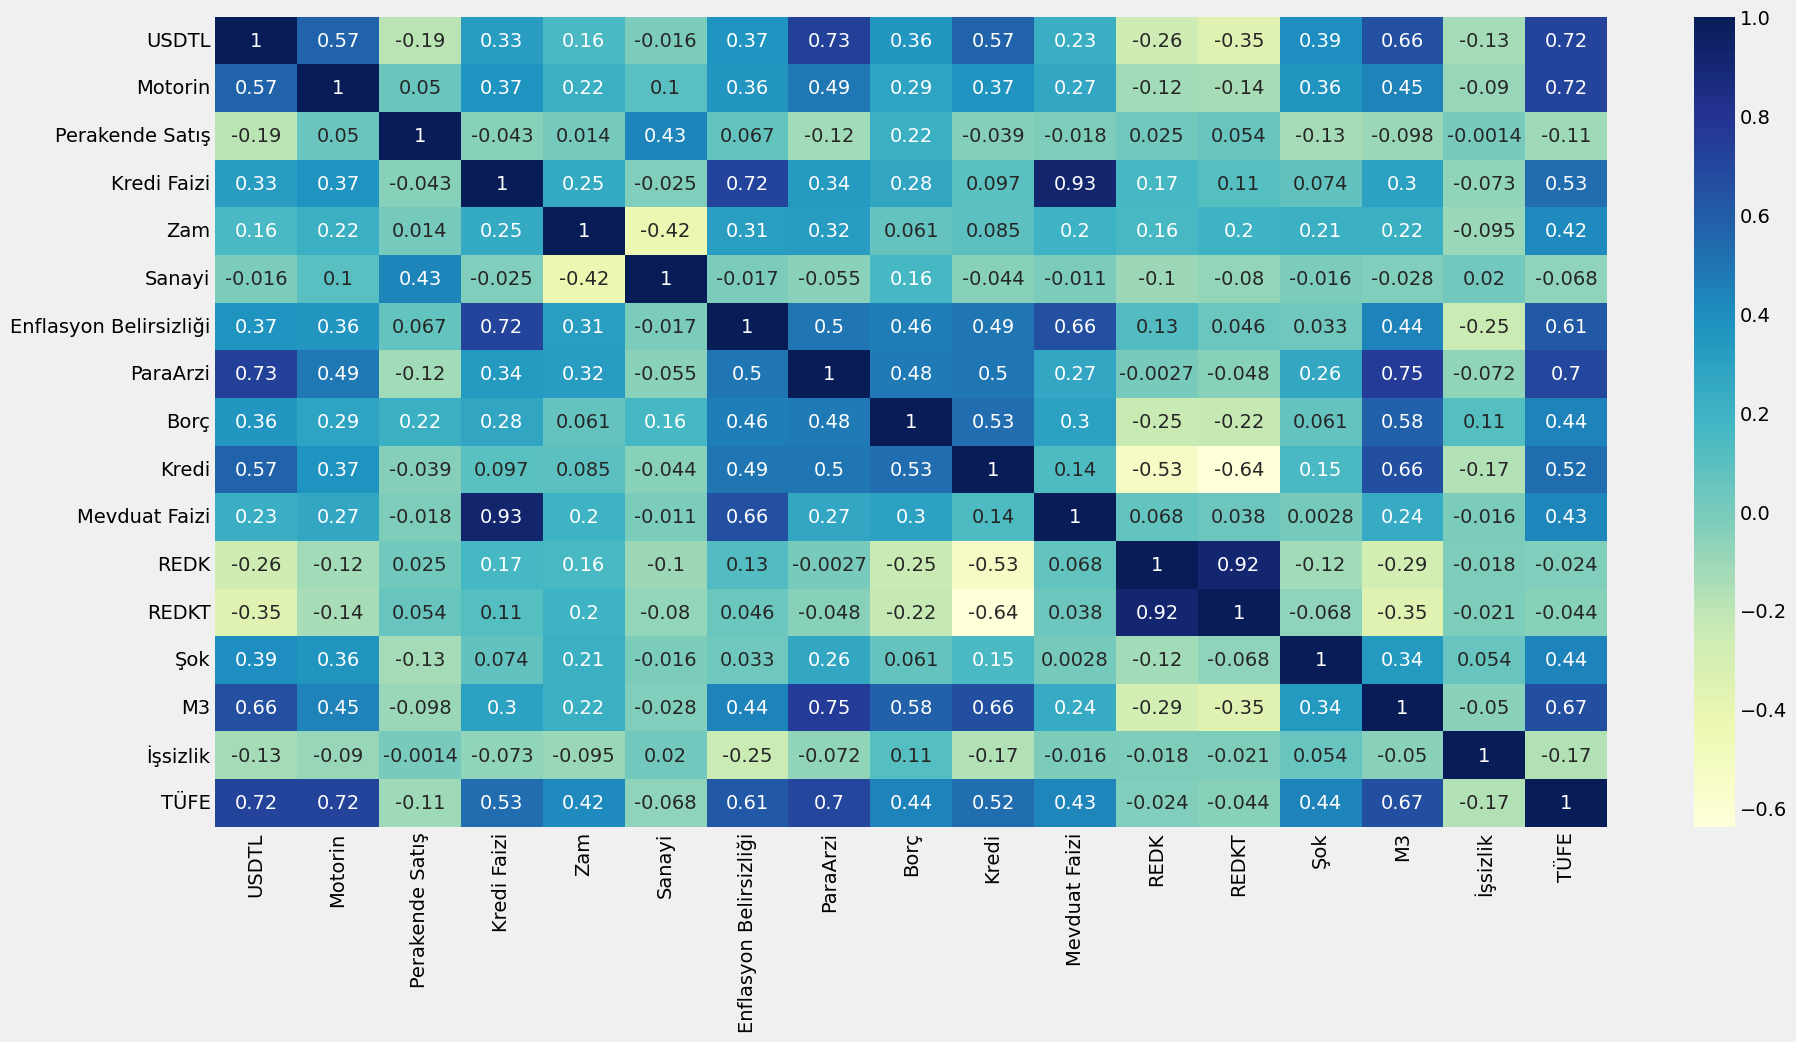

In [656]:
plt.figure(figsize=(20,10))
sns.heatmap(data.corr(),cmap="YlGnBu",annot=True)

In [657]:
features=['USDTL', 'Motorin', 'Kredi Faizi',
       'Enflasyon Belirsizliği', 'ParaArzi', 'Borç', 'Mevduat Faizi']

X = data[features]
reg = linear_model.Lars(fit_intercept=True)
reg.fit(X,y)



tüfetahmin6 = []
result = 1614.31
larstahmin=reg.predict(tahmindf[features])
for i in range(len(larstahmin)):
    result *= (1 + larstahmin[i] / 100)
    tüfetahmin6.append(result)

tüfetahmin6 = np.array(tüfetahmin6).reshape(-1, 1)
tüfetahmin6 = pd.DataFrame(tüfetahmin6)
tüfetahmin6.columns = ["Lars Regression"]
tüfetahmin6 = tüfetahmin6.set_index(pd.date_range(start="2023-09-30", end="2025-01-30", freq="1M"))
tüfetahmin6


,Lars Regression
2023-09-30,1691.96
2023-10-31,1744.50
2023-11-30,1804.92
2023-12-31,1887.98
2024-01-31,1973.75
2024-02-29,2060.57
2024-03-31,2140.79
2024-04-30,2221.70
2024-05-31,2315.13
2024-06-30,2405.01


In [658]:
features=['USDTL', 'Motorin', 'Kredi Faizi',
       'Enflasyon Belirsizliği', 'ParaArzi', 'Borç', 'Mevduat Faizi']
X = data[features]
krr = KernelRidge()
krr.fit(X, y)


tüfe = 1614  # İlk değeri 1691 ile başlatıyoruz

krrtahmin=krr.predict(tahmindf[features])
result = 1614.31
tüfetahmin7 = []
for i in range(len(krrtahmin)):
    result *= (1 + krrtahmin[i] / 100)
    tüfetahmin7.append(result)

tüfetahmin7 = np.array(tüfetahmin7).reshape(-1, 1)
tüfetahmin7 = pd.DataFrame(tüfetahmin7)
tüfetahmin7.columns = ["Kernel Regression"]
tüfetahmin7 = tüfetahmin7.set_index(pd.date_range(start="2023-09-30", end="2025-01-30", freq="1M"))
tüfetahmin7

,Kernel Regression
2023-09-30,1686.97
2023-10-31,1732.47
2023-11-30,1784.24
2023-12-31,1858.23
2024-01-31,1934.40
2024-02-29,2010.19
2024-03-31,2078.50
2024-04-30,2147.19
2024-05-31,2227.24
2024-06-30,2302.68


In [659]:

features=['USDTL', 'Motorin', 'Kredi Faizi',
       'Enflasyon Belirsizliği', 'ParaArzi', 'Borç', 'Mevduat Faizi']
X = data[features]
kernel = DotProduct() + WhiteKernel()
gpr = GaussianProcessRegressor(kernel=kernel)
y=data["TÜFE"]
gpr.fit(X, y) 


tüfe = 1614  # İlk değeri 1691 ile başlatıyoruz
tüfetahmin8 = []
gaustahmin=gpr.predict(tahmindf[features])
gaustahmin=1+(gaustahmin/100)
for elem in gaustahmin:
    tüfe *= elem  # Her elemanı sonuca çarp
    tüfetahmin8.append(tüfe)
tüfetahmin8=pd.DataFrame(tüfetahmin8)
tüfetahmin8=tüfetahmin8.set_index(pd.date_range(start="2023-09-30",end="2025-01-30",freq="1M"))
tüfetahmin8.columns=["Gaussian Regression"]

tüfetahmin8
        

,Gaussian Regression
2023-09-30,1686.65
2023-10-31,1732.15
2023-11-30,1783.90
2023-12-31,1857.89
2024-01-31,1934.05
2024-02-29,2009.83
2024-03-31,2078.14
2024-04-30,2146.83
2024-05-31,2226.87
2024-06-30,2302.31


In [660]:
features=['USDTL', 'Motorin', 'Kredi Faizi',
       'Enflasyon Belirsizliği', 'ParaArzi', 'Borç', 'Mevduat Faizi']
X = data[features]
reg = linear_model.BayesianRidge()
reg.fit(X, y)


tüfe = 1614  # İlk değeri 1691 ile başlatıyoruz
tüfetahmin9 = []
bayestahmin=reg.predict(tahmindf[features])
bayestahmin=1+(bayestahmin/100)
for elem in bayestahmin:
    tüfe *= elem  # Her elemanı sonuca çarp
    tüfetahmin9.append(tüfe)
tüfetahmin9=pd.DataFrame(tüfetahmin9)
tüfetahmin9=tüfetahmin9.set_index(pd.date_range(start="2023-09-30",end="2025-01-30",freq="1M"))
tüfetahmin9.columns=["Bayessian Regression"]

tüfetahmin9

,Bayessian Regression
2023-09-30,1693.52
2023-10-31,1749.80
2023-11-30,1813.99
2023-12-31,1901.75
2024-01-31,1992.88
2024-02-29,2085.32
2024-03-31,2171.36
2024-04-30,2258.83
2024-05-31,2359.54
2024-06-30,2456.83


In [661]:
tüfetahmin=pd.DataFrame()
tüfetahmin["SGD Regressor"]=tüfetahmin1["SGD Regressor"]
tüfetahmin["Linear Regression"]=tüfetahmin2["Linear Regression"]
tüfetahmin["Lasso Regression"]=tüfetahmin5["Lasso Regression"]
tüfetahmin["Lars Regression"]=tüfetahmin6["Lars Regression"]
tüfetahmin["Kernel Regression"]=tüfetahmin7["Kernel Regression"]
tüfetahmin["Gaussian Regression"]=tüfetahmin8["Gaussian Regression"]
tüfetahmin["Bayessian Regression"]=tüfetahmin9["Bayessian Regression"]
tüfetahmin["Ortalama"]=tüfetahmin.mean(axis=1)
tüfetahmin

,SGD Regressor,Linear Regression,Lasso Regression,Lars Regression,Kernel Regression,Gaussian Regression,Bayessian Regression,Ortalama
2023-09-30,1692.72,1691.96,1691.12,1691.96,1686.97,1686.65,1693.52,1690.70
2023-10-31,1760.17,1744.50,1742.56,1744.50,1732.47,1732.15,1749.80,1743.73
2023-11-30,1823.10,1804.92,1798.96,1804.92,1784.24,1783.90,1813.99,1802.00
2023-12-31,1897.62,1887.98,1879.30,1887.98,1858.23,1857.89,1901.75,1881.54
2024-01-31,2008.35,1973.75,1963.48,1973.75,1934.40,1934.05,1992.88,1968.66
2024-02-29,2085.45,2060.57,2046.58,2060.57,2010.19,2009.83,2085.32,2051.22
2024-03-31,2164.06,2140.79,2122.59,2140.79,2078.50,2078.14,2171.36,2128.03
2024-04-30,2255.36,2221.70,2200.98,2221.70,2147.19,2146.83,2258.83,2207.51
2024-05-31,2344.08,2315.13,2290.94,2315.13,2227.24,2226.87,2359.54,2296.99
2024-06-30,2428.76,2405.01,2375.94,2405.01,2302.68,2302.31,2456.83,2382.36


In [662]:
dates=pd.date_range('2006-02-01','2023-10-01' , freq='1M')
df=pd.DataFrame()

df["CPI"]=inflation["TÜFE"]
df=df.set_index(dates)





dfas1=pd.DataFrame()
dfas1=pd.concat([df["CPI"],tüfetahmin.iloc[1:,0]],axis=0)
dfas1=pd.DataFrame(dfas1)
dfas1.columns=[tüfetahmin.columns[0]]

dfas2=pd.DataFrame()
dfas2=pd.concat([df["CPI"],tüfetahmin.iloc[1:,1]],axis=0)
dfas2=pd.DataFrame(dfas2)
dfas2.columns=[tüfetahmin.columns[1]]



dfas4=pd.DataFrame()
dfas4=pd.concat([df["CPI"],tüfetahmin.iloc[1:,2]],axis=0)
dfas4=pd.DataFrame(dfas4)
dfas4.columns=[tüfetahmin.columns[2]]

dfas5=pd.DataFrame()
dfas5=pd.concat([df["CPI"],tüfetahmin.iloc[1:,3]],axis=0)
dfas5=pd.DataFrame(dfas5)
dfas5.columns=[tüfetahmin.columns[3]]

dfas6=pd.DataFrame()
dfas6=pd.concat([df["CPI"],tüfetahmin.iloc[1:,4]],axis=0)
dfas6=pd.DataFrame(dfas6)
dfas6.columns=[tüfetahmin.columns[4]]

dfas7=pd.DataFrame()
dfas7=pd.concat([df["CPI"],tüfetahmin.iloc[1:,5]],axis=0)
dfas7=pd.DataFrame(dfas7)
dfas7.columns=[tüfetahmin.columns[5]]

dfas8=pd.DataFrame()
dfas8=pd.concat([df["CPI"],tüfetahmin.iloc[1:,6]],axis=0)
dfas8=pd.DataFrame(dfas8)
dfas8.columns=[tüfetahmin.columns[6]]

'''dfas9=pd.DataFrame()
dfas9=pd.concat([df["CPI"],tüfetahmin.iloc[1:,7]],axis=0)
dfas9=pd.DataFrame(dfas9)
dfas9.columns=[tüfetahmin.columns[7]]

dfas10=pd.DataFrame()
dfas10=pd.concat([df["CPI"],tüfetahmin.iloc[1:,8]],axis=0)
dfas10=pd.DataFrame(dfas10)
dfas10.columns=[tüfetahmin.columns[8]]'''





dfas=pd.DataFrame()
dfas=pd.concat([dfas1,dfas2,dfas4,dfas5,dfas6,dfas7,dfas8],axis=1)
dfas=dfas.pct_change(periods=12)*100
dfas=dfas.dropna(axis=0)
dfas

df["Enflasyon"]=df["CPI"].pct_change(periods=12)*100
df=df.dropna(axis=0)








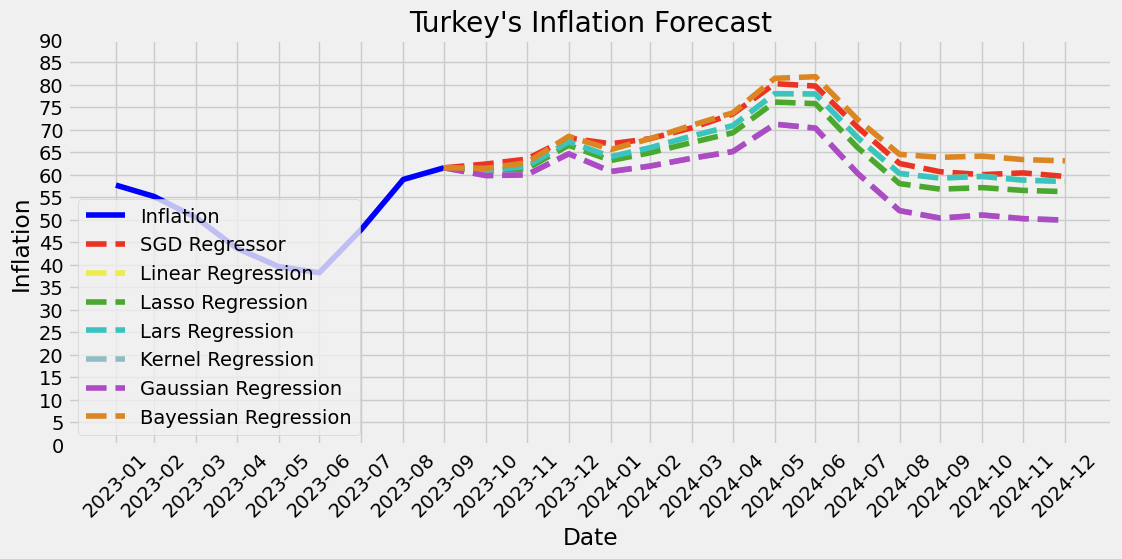

In [663]:








# Grafik çizdirelim
plt.figure(figsize=(12, 5))
plt.plot(df.iloc[191:200,1], label='Inflation', color='blue')
plt.plot(dfas.iloc[199:,0],'--',label=dfas.columns[0], color='#EB3324')
plt.plot(dfas.iloc[199:,1],'--',label=dfas.columns[1], color='#EDEB4F')
plt.plot(dfas.iloc[199:,2],'--',label=dfas.columns[2], color='#4AA82E')
plt.plot(dfas.iloc[199:,3],'--',label=dfas.columns[3], color='#39C4C2')
plt.plot(dfas.iloc[199:,4],'--',label=dfas.columns[4],color='#92BCC4')
plt.plot(dfas.iloc[199:,5],'--',label=dfas.columns[5],color='#AD4AC4')
plt.plot(dfas.iloc[199:,6],'--',label=dfas.columns[6],color='#DB8622')
#plt.plot(dfas.iloc[199:,7],'--',label=dfas.columns[7])
#plt.plot(dfas.iloc[199:,8],'--',label=dfas.columns[8])
plt.xlabel('Date')
plt.ylabel('Inflation')
plt.xticks(dfas.iloc[191:].index, dfas.iloc[191:].index.strftime('%Y-%m'), rotation=45)
y_max = 100
y_min = 10
y_interval = 0.5
y_ticks = [0]
while y_ticks[-1] < 90:
    y_ticks.append(y_ticks[-1] + 5)









# Y ekseni etiketlerini ayarlama
plt.yticks(y_ticks)
plt.title("Turkey's Inflation Forecast")
plt.legend(loc=3)
plt.grid(True)
plt.show()


In [664]:
eylül_tahmin=((tüfetahmin.iloc[0,:-1]/1614.31)-1)*100
np.abs(eylül_tahmin-4.75).sort_values()

Lasso Regression       0.01
Linear Regression      0.06
Lars Regression        0.06
SGD Regressor          0.11
Bayessian Regression   0.16
Kernel Regression      0.25
Gaussian Regression    0.27
Name: 2023-09-30 00:00:00, dtype: float64

In [665]:
aylıktahmin=tüfetahmin.pct_change(periods=1)*100
aylıktahmin=aylıktahmin.dropna(axis=0)
row=pd.DataFrame({eylül_tahmin.index[0]:eylül_tahmin[0],eylül_tahmin.index[1]:eylül_tahmin[1],eylül_tahmin.index[2]:eylül_tahmin[2],eylül_tahmin.index[3]:eylül_tahmin[3],eylül_tahmin.index[4]:eylül_tahmin[4],eylül_tahmin.index[5]:eylül_tahmin[5],eylül_tahmin.index[6]:eylül_tahmin[6]},index=pd.date_range(start="2023-09-30",end="2023-10-29",freq="1M"))
aylıktahmin=pd.concat([row,aylıktahmin],axis=0)
aylıktahmin["Ortalama"]=aylıktahmin.mean(axis=1)
aylıktahmin["Medyan"]=aylıktahmin.median(axis=1)
aylıktahmin

,SGD Regressor,Linear Regression,Lasso Regression,Lars Regression,Kernel Regression,Gaussian Regression,Bayessian Regression,Ortalama,Medyan
2023-09-30,4.86,4.81,4.76,4.81,4.50,4.48,4.91,4.73,4.78
2023-10-31,3.98,3.11,3.04,3.11,2.70,2.70,3.32,3.14,3.11
2023-11-30,3.58,3.46,3.24,3.46,2.99,2.99,3.67,3.34,3.40
2023-12-31,4.09,4.60,4.47,4.60,4.15,4.15,4.84,4.41,4.44
2024-01-31,5.83,4.54,4.48,4.54,4.10,4.10,4.79,4.63,4.54
2024-02-29,3.84,4.40,4.23,4.40,3.92,3.92,4.64,4.19,4.21
2024-03-31,3.77,3.89,3.71,3.89,3.40,3.40,4.13,3.74,3.76
2024-04-30,4.22,3.78,3.69,3.78,3.30,3.31,4.03,3.73,3.76
2024-05-31,3.93,4.20,4.09,4.20,3.73,3.73,4.46,4.05,4.07
2024-06-30,3.61,3.88,3.71,3.88,3.39,3.39,4.12,3.71,3.71


In [666]:
yıllıktahmin=pd.DataFrame(dfas)
yıllıktahmin["Ortalama"]=yıllıktahmin.mean(axis=1)
yıllıktahmin["Medyan"]=yıllıktahmin.median(axis=1)
yıllıktahmin.tail(16)


,SGD Regressor,Linear Regression,Lasso Regression,Lars Regression,Kernel Regression,Gaussian Regression,Bayessian Regression,Ortalama,Medyan
2023-09-30,61.53,61.53,61.53,61.53,61.53,61.53,61.53,61.53,61.53
2023-10-31,62.38,60.93,60.75,60.93,59.82,59.79,61.42,60.86,60.90
2023-11-30,63.47,61.84,61.30,61.84,59.98,59.95,62.65,61.58,61.71
2023-12-31,68.16,67.31,66.54,67.31,64.67,64.64,68.53,66.74,67.02
2024-01-31,66.88,64.00,63.15,64.00,60.73,60.70,65.59,63.58,63.79
2024-02-29,68.00,66.00,64.87,66.00,61.94,61.91,67.99,65.24,65.62
2024-03-31,70.43,68.60,67.17,68.60,63.69,63.67,71.01,67.59,68.10
2024-04-30,73.48,70.90,69.30,70.90,65.16,65.14,73.75,69.80,70.35
2024-05-31,80.23,78.00,76.14,78.00,71.25,71.22,81.42,76.61,77.31
2024-06-30,79.70,77.94,75.79,77.94,70.37,70.34,81.77,76.26,77.10


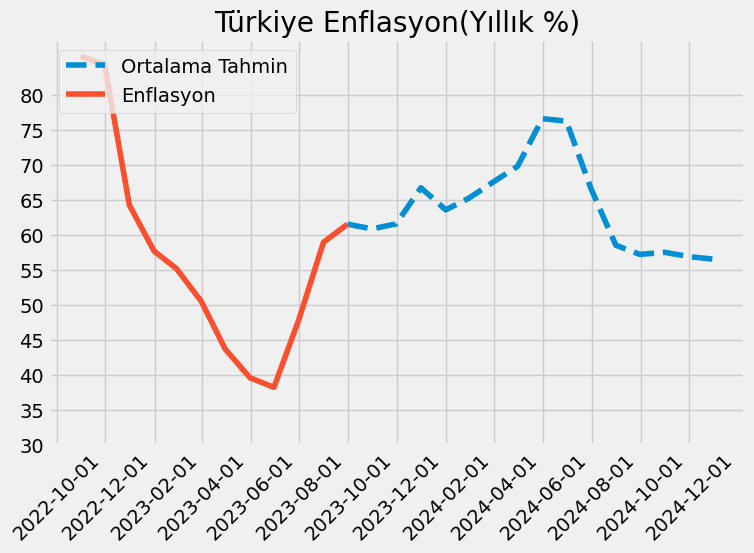

In [667]:
plt.style.use('fivethirtyeight')
plt.figure(figsize=(8,5))
plt.plot(yıllıktahmin["Ortalama"].tail(16),'--',label="Ortalama Tahmin")
plt.plot(yıllıktahmin["Ortalama"].iloc[-27:-15],label="Enflasyon")
plt.xticks(yıllıktahmin.tail(27).index.strftime("%Y-%m")[::2],rotation=45)
plt.yticks(np.arange(30,85,5))
plt.title("Türkiye Enflasyon(Yıllık %)")
plt.legend(loc=2)
plt.show()